# TMDb Movies Dataset Analysis

##   by Abdessalam Dai

## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#wrangling">2. Data Wrangling</a></li>
<li><a href="#eda">3. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">4. Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction


<a id='data-description'></a>
### 1.1 Data Description

This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. It has 21 columns.

<a id='data-description'></a>
### 1.2 Questions

These are the questions we plan on exploring in the data analysis section:
- How many movies were released each decade?
- Which actors have most appearances in movies?
- Which actors are most frequent in the top 500 movies?
- Which directors directed most movies?
- Which directors are most frequent in the top 500 movies?
- Which production companies made most movies?
- What are the Top 10 most frequent genres?
- Which genres are most popular?
- Which genres have the highest rating?
- Which 3 genres are most popular from decade to decade?
- What are the most popular keywords?
- What are the Top 10 movies with heighest budget?
- What are the Top 10 movies with heighest revenue?
- What are the Top 10 most popular movies?
- What are the Top 10 movies by average vote?
- What are the relationships between revenue, budget, popularity and average vote?

<a id='necessary-packages'></a>
### 1.3 Importing necessary packages

In this section we're going to import the necessary modules that we will use to perform our data analysis. We will use the `wordcloud` module to display wordcloud images for certain features of the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## 2. Data Wrangling

### 2.1 General Properties

#### 2.1.1 Loading the data

We are going to load the dataset and visualise its first 3 rows.

In [2]:
df = pd.read_csv('Database_TMDb_movie_data.csv', header=0)
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


#### 2.1.2 Columns with multiple values

We can see that the columns `cast`, `genres` and `production_companies` contain multiple values separated by pipes (|).
This applies to the `director` column as well, for example if we inspect the movie with index 100 we can see that it has two directors separated by a pipe.

In [3]:
df.iloc[100].director

'Chris Buck|Jennifer Lee'

#### 2.1.3 Data dimensions
This dataset has 10866 rows and 21 columns.

In [4]:
df.shape

(10866, 21)

#### 2.1.4 Data features description
- popularity : a positive value, the highest popularity is <b>32.985763</b>
- budget and revenue : positive values in American Dollars
- vote_average : the average vote of the movie (rating)
- runtime : in minutes
- release year : between <b>1970</b> and <b>2015</b>

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### 2.1.5 Data columns

The following columns are unnecessary for our analysis: `id`, `imdb_id`, `release_date`, `homepage`, `tagline`, `overview`.

The IDs aren't necessary.

We don't need the release date as we will be performing analysis only on the release year.

We also don't need the homepage, tagline or overview.

We are going to drop these columns in data cleaning process.

In [7]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

#### 2.1.6 Checking for duplicate rows

There's only one duplicate row, we are going to remove it in the data cleaning process.

In [8]:
print(f'Number of duplicate rows: {df[df.duplicated()].shape[0]}')

Number of duplicate rows: 1


#### 2.1.7 Checking for missing values

There are many missing values in the following columns: `homepage` and `tagline`, but that is not a problem because we won't use those columns. And there are also some missing values in the following columns: `cast`, `director`, `keywords`, `production_companies` and `genres`.

We will drop the rows with missing values is the data cleaning process.

In [9]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### 2.2  Data Cleaning

It is clear that some cleaning needs to be done on the dataset. So, let's do that first.

#### 2.2.1 Droping unnecessary columns

Let's drop these unnecessary columns as we won't need them for our analysis: `id`, `imdb_id`, `release_date`, `homepage`, `tagline`, `overview`.

We will use the `drop` function.

In [28]:
unnecessary_columns = ['id', 'imdb_id', 'release_date', 'homepage', 'tagline', 'overview']

# axis = 1; means that we are dropping columns
df.drop(unnecessary_columns, axis=1, inplace=True)

Let's check the dataset's columns again.

In [29]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'keywords', 'runtime', 'genres', 'production_companies', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

#### 2.2.2 Removing duplicate rows

Let's remove that one duplicate row that we have seen.

We will use the `drop_duplicates` function.

In [30]:
df.drop_duplicates(inplace=True)

Now our dataset contains zero duplicate rows.

In [31]:
print(f'Number of duplicate rows: {df[df.duplicated()].shape[0]}')

Number of duplicate rows: 0


#### 2.2.3 Removing rows with missing values

We will now remove rows with missing values so that we have a clean dataset.

We will use the `dropna` function.

In [32]:
# axis = 0; means that we are dropping rows
# how = 'any'; if any NA values are present, drop that row
df.dropna(axis=0, how='any', inplace=True)

After dropping rows which contain missing values, dropping duplicate rows and dropping unnecessary columns, our dataset has now 15 columns and 8666 rows. So we dropped 2200 rows which is 20% of the dataset.

In [33]:
df.shape

(8666, 15)

<a id='eda'></a>
## 3. Exploratory Data Analysis

### 3.1 Exploring movies throughout the decades

#### 3.1.1 How many movies were released each decade?

The number of movies released is increasing every decade. There are more movies in the 2000s than in the 2000s because this dataset contains records before the year 2015.

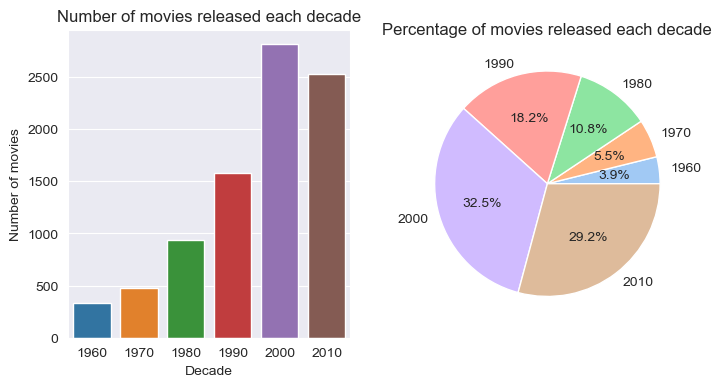

In [34]:
df_decades = df.groupby((df.release_year//10)*10).count().loc[:, ['release_year']]
df_decades.rename(columns={'release_year': "decade", 'release_year': "movies_count"}, inplace=True)


fig = plt.figure(figsize = (8, 4))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(df_decades, x=df_decades.index, y='movies_count');
ax1.set(xlabel='Decade', ylabel='Number of movies', title='Number of movies released each decade');

ax2 = fig.add_subplot(1,2,2)
ax2 = df.groupby((df.release_year//10)*10).count().release_year.plot.pie(
    title="Percentage of movies released each decade", 
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    ylabel=''
);

### 3.2 Exploring actors/actresses

#### 3.2.1 Which actors have most appearances in movies?

First, let's define the function <i>get_counts</i>:

We are going to use this function to get counts for columns that are separated by pipes (|), like `genres`, `cast`, `production_companies` and `keywords`.

It takes as inputs the column name that we want to get the counts for, the new column name, and the dataframe.

It returns a sorted dataframe with two columns. The first column contains values, the second column contains the number of occurences in the dataset.

<u>Example:</u>

<i>get_counts('genres', 'genre', df)</i> returns the following dataframe:


genre | count
--- | --- | 
Drama | 3934 |
Comedy | 3060 | 
... | ... |

In [35]:
def get_counts(col, new_col, original_df):
    lists = np.array(original_df[col].str.split('|'))
    counts = {}
    for list_ in lists:
        for x in list_:
            x = x.strip()
            if x in counts:
                counts[x] += 1
            else:
                counts[x] = 1
    counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse = True))
    new_df = pd.DataFrame(counts.items(), columns=[new_col, 'count'])
    return new_df

By the help of the function we defined above, we get the following visualisations:

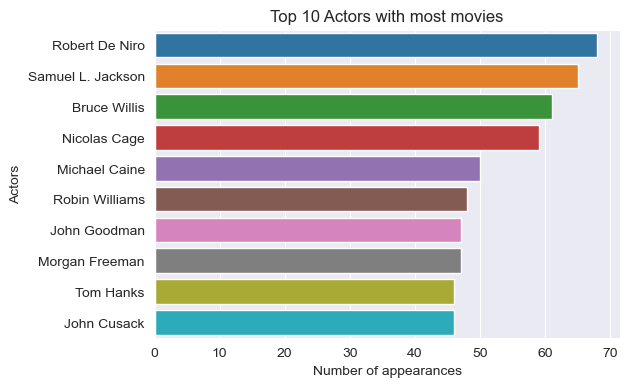

In [36]:
fig = plt.figure(figsize = (6, 4))
df_actors = get_counts(col='cast', new_col='actor', original_df=df)
ax = sns.barplot(df_actors.head(10), x='count', y='actor');
ax.set(xlabel='Number of appearances', ylabel='Actors', title='Top 10 Actors with most movies');

#### 3.2.2 Which actors are most frequent in the top 500 movies?

The following code finds the top 500 movies by sorting the dataset according to the column `popularity` and selecting the first 500 rows.

In [37]:
df_top500_movies = df.sort_values('popularity', ascending=False).head(500)

By the help of the function <i>get_counts</i>, we get the the most frequent actors in the top 500 movies dataframe.

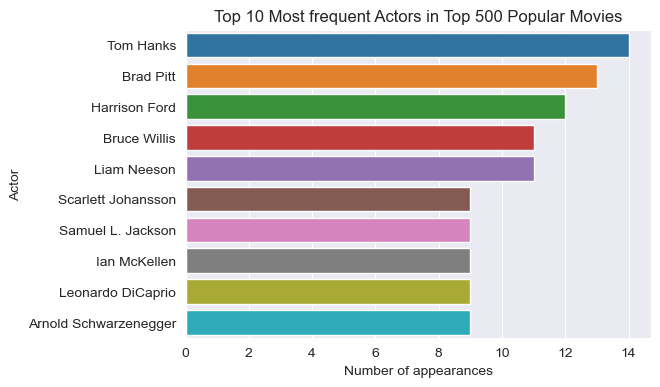

In [38]:
fig = plt.figure(figsize = (6, 4))
df_actors = get_counts(col='cast', new_col='actor', original_df=df_top500_movies)
ax = sns.barplot(df_actors.head(10), x='count', y='actor');
ax.set(xlabel='Number of appearances', ylabel='Actor', title='Top 10 Most frequent Actors in Top 500 Popular Movies');

### 3.3 Exploring directors

In this section, we are going to answer the same two questions of actors that we have seen in the previous section. But this time, we will perform studies on directors.

#### 3.3.1 Which directors directed most movies?

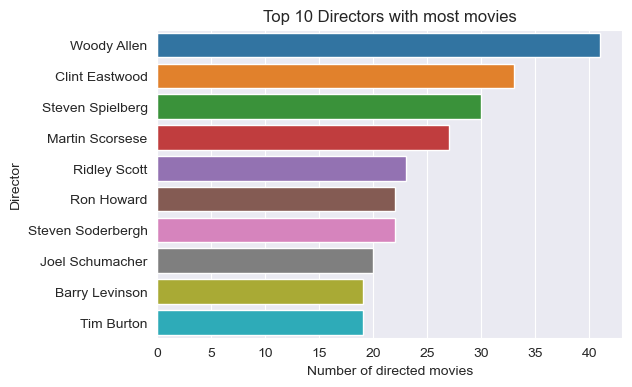

In [39]:
fig = plt.figure(figsize = (6, 4))
df_directors = get_counts(col='director', new_col='director', original_df=df)
ax = sns.barplot(df_directors.head(10), x='count', y='director');
ax.set(xlabel='Number of directed movies', ylabel='Director', title='Top 10 Directors with most movies');

#### 3.3.2 Which directors are most frequent in the top 500 movies?

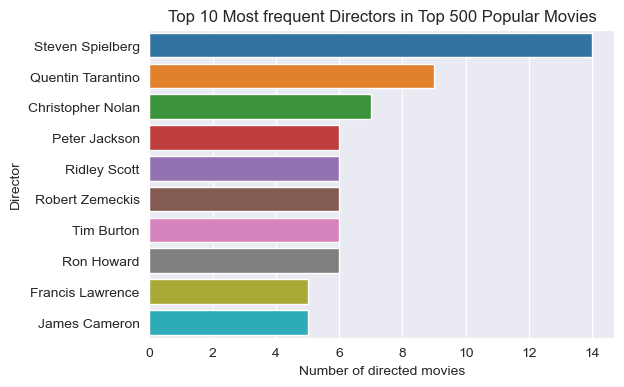

In [40]:
fig = plt.figure(figsize = (6, 4))
df_directors = get_counts(col='director', new_col='director', original_df=df_top500_movies)
ax = sns.barplot(df_directors.head(10), x='count', y='director');
ax.set(xlabel='Number of directed movies', ylabel='Director', title='Top 10 Most frequent Directors in Top 500 Popular Movies');

### 3.4 Exploring Production Companies

#### 3.4.1 Which production companies made most movies?

We can see that Warner Bros. and Universal Pictures are on the top of the list, having made about 500 movies.

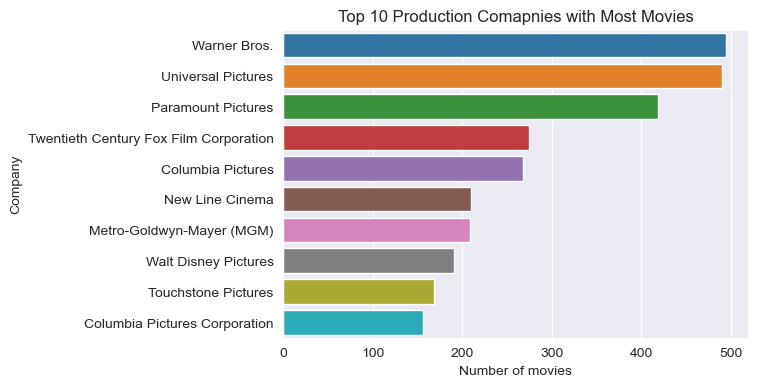

In [41]:
fig = plt.figure(figsize = (6, 4))
df_companies = get_counts(col='production_companies', new_col='company', original_df=df)
ax = sns.barplot(df_companies.head(10), x='count', y='company');
ax.set(xlabel='Number of movies', ylabel='Company', title='Top 10 Production Comapnies with Most Movies');

### 3.5 Exploring Movies based on their Genres and Keywords

#### 3.5.1 What are the Top 10 most frequent genres?

There are almost 4000 Drama movies, which is about 50% of the dataset.

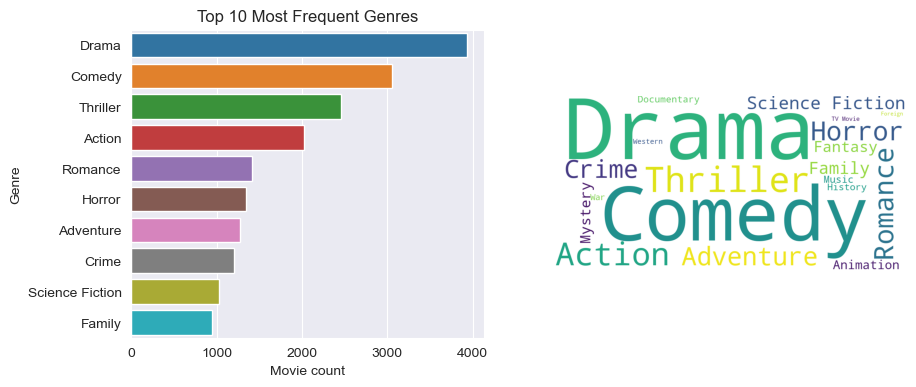

In [42]:
fig = plt.figure(figsize = (10, 4))

# top 10 most popular genres
ax1 = fig.add_subplot(1,2,1)
genres_df = get_counts(col='genres', new_col='genre', original_df=df)
ax1 = sns.barplot(genres_df.head(10), x='count', y='genre');
ax1.set(xlabel='Movie count', ylabel='Genre', title='Top 10 Most Frequent Genres');

# wordcloud for genres
genres_counts = genres_df.set_index('genre').to_dict()['count']
ax2 = fig.add_subplot(1,2,2)
ax2 = WordCloud(background_color='white', width = 1000, height = 500).generate_from_frequencies(genres_counts)
plt.imshow(ax2);
plt.axis("off");

#### 3.5.2 Which genres are most popular?

Let's create a new dataframe that contains all movies but the genres must be separated. So that we can perform a groupby operations on genres.

In [43]:
df_separate_genres = pd.DataFrame(columns=['revenue', 'budget', 'popularity', 'genre', 'release_year', 'vote_average'])

for index, row in df.iterrows():
    genres = np.array(row['genres'].split('|'))
    for genre in genres:
        new_row = [row.revenue, row.budget, row.popularity, genre, row.release_year, row.vote_average]
        df_separate_genres.loc[len(df_separate_genres)] = new_row

We can see that Adventure, Science Fiction, Fanntasy, Action and Animation are the most popular.

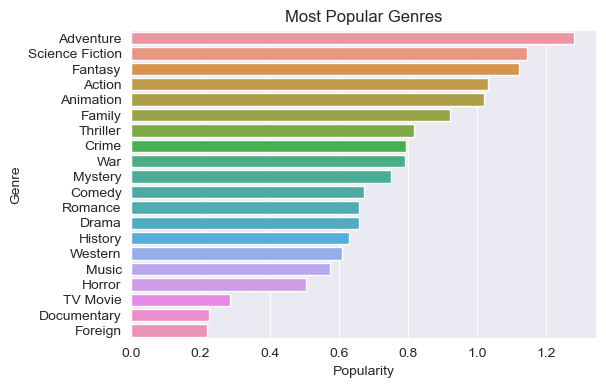

In [44]:
fig = plt.figure(figsize = (6, 4))
df_mostpopular_genres = df_separate_genres.groupby('genre').mean().sort_values('popularity', ascending=False)
ax = sns.barplot(df_mostpopular_genres, x='popularity', y=df_mostpopular_genres.index);
ax.set(xlabel='Popularity', ylabel='Genre', title='Most Popular Genres');

#### 3.5.3 Which genres have the highest rating?

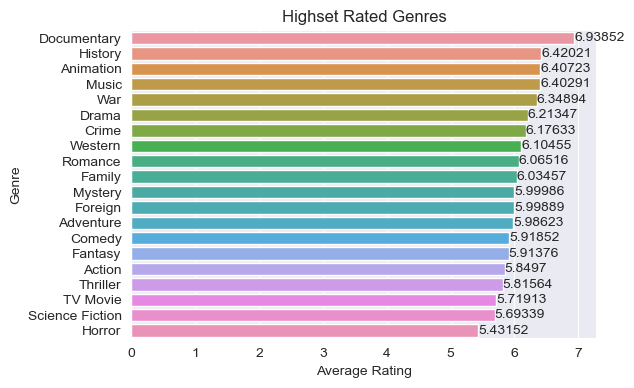

In [45]:
fig = plt.figure(figsize = (6, 4))
df_highestrating_genres = df_separate_genres.groupby('genre').mean().sort_values('vote_average', ascending=False)
ax = sns.barplot(df_highestrating_genres, x='vote_average', y=df_highestrating_genres.index);
ax.set(xlabel='Average Rating', ylabel='Genre', title='Highset Rated Genres');
ax.bar_label(ax.containers[0]);

#### 3.5.3 Which 3 genres are most popular from decade to decade?

In [46]:
df_decades_genres = df_separate_genres.groupby([(df.release_year//10)*10, 'genre']).mean()
df_decades_genres.rename(index={'release_year': "decade"}, inplace=True)
df_decades_genres.drop(columns=['release_year'], inplace=True)
df_decades_genres.index.rename(['decade', 'genre'], inplace=True)
df_decades_genres.index = df_decades_genres.index.set_levels(
    [df_decades_genres.index.levels[0].astype(int), df_decades_genres.index.levels[1]]
)
df_decades_genres = df_decades_genres.groupby('decade').apply(
    lambda decade: decade.sort_values('popularity', ascending=False).head(3)).droplevel(1)

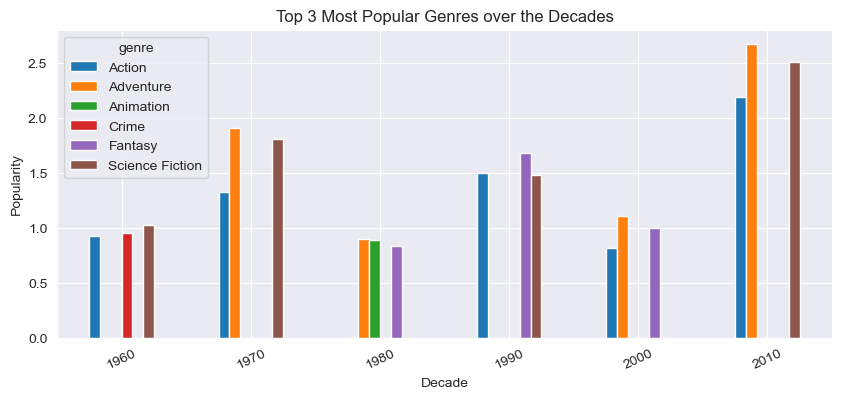

In [187]:
ax = df_decades_genres['popularity'].unstack().plot(kind='bar', figsize=(10, 4));
ax.set(xlabel='Decade', ylabel='Popularity', title='Top 3 Most Popular Genres over the Decades');
plt.xticks(rotation=25);

#### 3.5.4 What are the most popular keywords?

Let us see what keywords are most popular among movies.

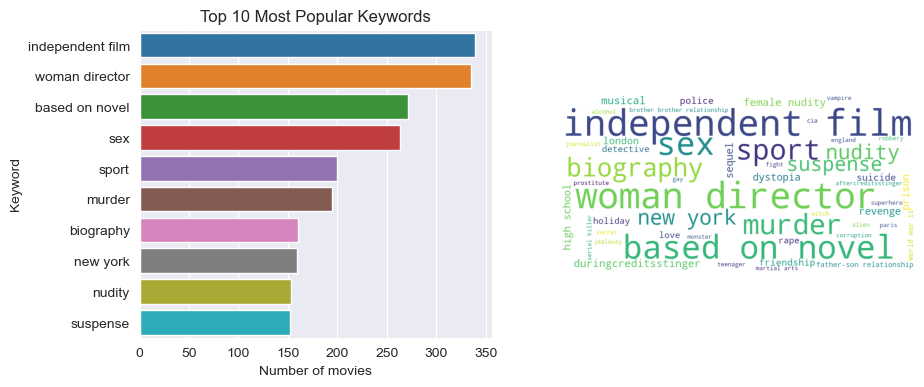

In [51]:
keywords_df = get_counts(col='keywords', new_col='keyword', original_df=df)

fig = plt.figure(figsize = (10, 4))

# top 10 most popular keywords
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(keywords_df.head(10), x='count', y='keyword');
ax1.set(xlabel='Number of movies', ylabel='Keyword', title='Top 10 Most Popular Keywords');

# keywords wordcloud
ax2 = fig.add_subplot(1,2,2)
keywords_counts = keywords_df.set_index('keyword').to_dict()['count']
ax2 = WordCloud(background_color='white',
                      max_words=50,
                      width = 1000, height = 500).generate_from_frequencies(keywords_counts)
plt.imshow(ax2);
plt.axis("off");

### 3.6 Top Movies based on features

#### 3.6.1 What are the Top 10 movies with heighest budget?

First, let's define the function currency that returns an amount of money in a readable format (ex.  1000.0k, 1000.0M or  1000.0B)

In [52]:
def currency(x, pos):
    """ x is the value and pos is the tick position """
    if x >= 1e9:
        return '${:1.1f}B'.format(x*1e-9)
    if x >= 1e6:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)

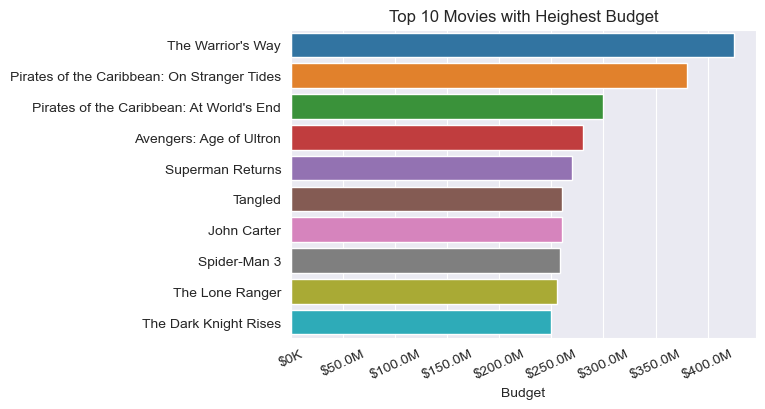

In [53]:
fig = plt.figure(figsize = (6, 4))
df_top10 = df.sort_values('budget', ascending=False).head(10)
ax = sns.barplot(df_top10, x='budget', y='original_title');
ax.set(xlabel='Budget', ylabel='', title='Top 10 Movies with Heighest Budget');
ax.xaxis.set_major_formatter(currency);
plt.xticks(rotation=25);

#### 3.6.2 What are the Top 10 movies with heighest revenue?

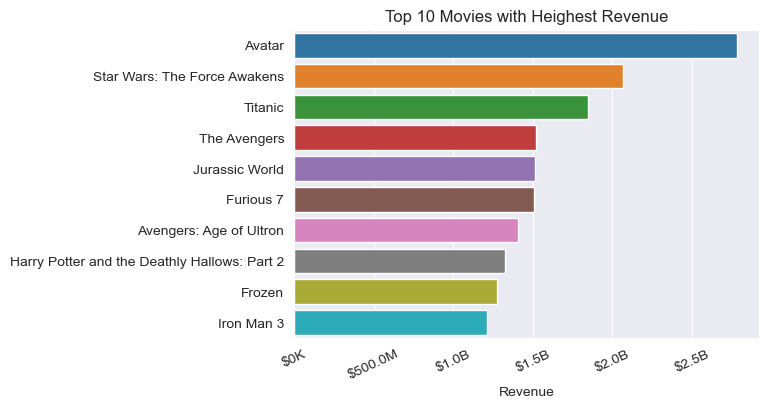

In [55]:
fig = plt.figure(figsize = (6, 4))
df_top10 = df.sort_values('revenue', ascending=False).head(10)
ax = sns.barplot(df_top10, x='revenue', y='original_title');
ax.set(xlabel='Revenue', ylabel='', title='Top 10 Movies with Heighest Revenue');
ax.xaxis.set_major_formatter(currency);
plt.xticks(rotation=25);

#### 3.6.3 What are the Top 10 most popular movies?

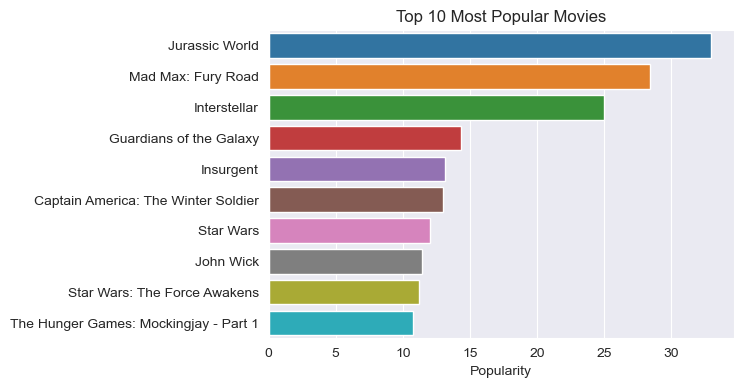

In [56]:
fig = plt.figure(figsize = (6, 4))
df_top10 = df.sort_values('popularity', ascending=False).head(10)
ax = sns.barplot(df_top10, x='popularity', y='original_title');
ax.set(xlabel='Popularity', ylabel='', title='Top 10 Most Popular Movies');

#### 3.6.4 What are the Top 10 movies by average vote?

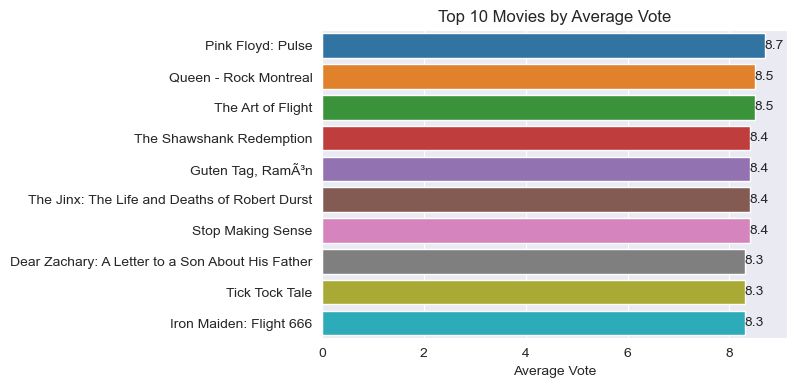

In [57]:
fig = plt.figure(figsize = (6, 4))
df_top10 = df.sort_values('vote_average', ascending=False).head(10)
ax = sns.barplot(df_top10, x='vote_average', y='original_title');
ax.bar_label(ax.containers[0]);
ax.set(xlabel='Average Vote', ylabel='', title='Top 10 Movies by Average Vote');

### 3.7 What are the relationships between revenue, budget, popularity and average vote?

From the heatmap in the figure below, we can see that there is a high correlation between `budget` and `revenue`, and between `popularity` and `revenue`.

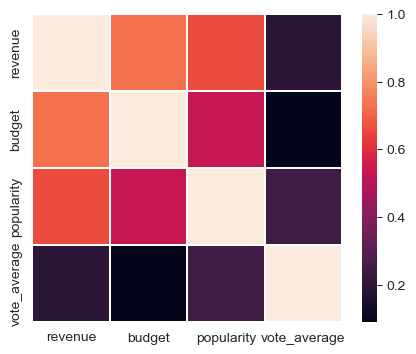

In [58]:
plt.figure(figsize=(5, 4))
ax = sns.heatmap(df.loc[:, ['revenue', 'budget', 'popularity', 'vote_average']].corr(), linewidths=0.07);

It seems that there is a linear correlation between revenue and popularity, and between budget and revenue.

<Figure size 500x500 with 0 Axes>

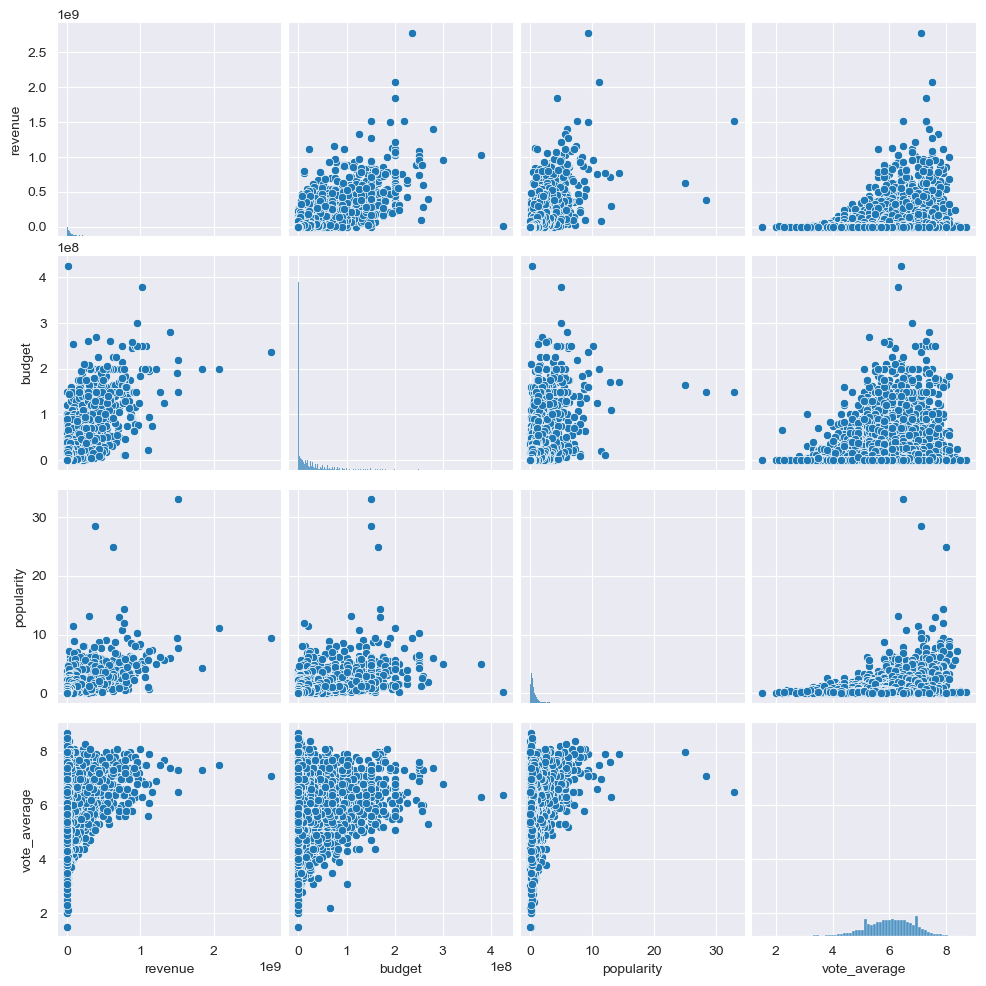

In [59]:
plt.figure(figsize=(5, 5));
sns.pairplot(df.loc[:, ['revenue', 'budget', 'popularity', 'vote_average']]);

<a id='conclusions'></a>
## 4. Conclusions

> ### 4.1 Results 
>- Every year, more movies are released.
>- More than any other actor, actors like Robert De Niro and Samuel L. Jackson have appeared in numerous films. With over 40 films under their belts.
>- Woody Allen holds the record for most films directed.
>- The studios that produced the majority of films were Warner Bros., Universal Pictures, and Paramount Pictures.
>- Over decades, genre interest changes.
>- Adventure, Science Fiction, Fantasy, Action, and Animation are the most watched genres.
>- The top five genres for viewers' ratings are war, music, animation, documentaries, and history.
>- Avatar, Star Wars: The Force Awakens, Titanic, The Avengers, and Jurassic World are the top-grossing films.
>- Jurassic World, Mad Max, Interstellar, Guardians of the Galaxy, and Insurgent are the most well-liked films.
>- There is a high correlation between budget and revenue, and between popularity and revenue. So the more money spent on the production of a movie, the higher chance of its success.

> ### 4.2 Data Limitations
> Even though this dataset contains over 10,000 movies, it's insufficient to make accurate observations and conclusions because of the following reasons :
>- This dataset is outdated, it contains movies that were released between 1960 and 2015. So, the conclusions we have made are only specific to that period of time.
>- Many values in the dataset are missing or NULL. Therefore, we had to drop 20% of rows.
>- Many columns were unnecessary for data analysis.